In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go

In [4]:
plotly.tools.set_credentials_file(username='abi.mvasquez', api_key='pX9WEUeT7jYv9HAtbhHX')

NameError: name 'plotly' is not defined

### School Funding (Revenue) by State ###

In [8]:
rev_data = os.path.join('Resources','Stfis14_1a.csv')
rev_data_df = pd.read_csv(rev_data)
rev_data_df.head()

,SURVYEAR,FIPS,STABR,STNAME,R1A,R1B,R1C,R1D,R1E,R1F,...,A14B,PPE15,MEMBR13,ARRASTE1,ARRATE5,ARRAE81Z,ARRATE10,ARRASTE6,ARRATLEIZ,ARRASTE4
0,2014,1,AL,Alabama,-2,-2,1128860063,621382410,6131559,1033208,...,706566,8767,746204,805460,1404270,17206,0,15000,107591,0
1,2014,2,AK,Alaska,-2,-2,295232764,161453827,142222,159692,...,-2,19699,130944,20946,46923,0,0,0,0,0
2,2014,4,AZ,Arizona,2979308590,-2,-2,66772046,5748335,18493579,...,-2,7783,1102445,0,0,0,0,0,0,0
3,2014,5,AR,Arkansas,1619649401,1223591,-2,11117198,10086128,2445184,...,-2,9946,489979,1175969,4031513,0,72883,0,0,0
4,2014,6,CA,California,18407152429,933627693,168400,-2,1117595,371734184,...,-2,9740,6312623,22075494,37624403,402380,166270,0,29240684,0


In [9]:
# filtering out the wanted data
rev_data_df = rev_data_df[["SURVYEAR", "STABR", "STNAME", "STR1", "R3", "STR4", "TR", "E11", "E11A"]]
rev_data_df.head()

,SURVYEAR,STABR,STNAME,STR1,R3,STR4,TR,E11,E11A
0,2014,AL,Alabama,2479526880,4065545836,838649689,7396933084,2495972800,1775677776
1,2014,AK,Alaska,529595705,1835601093,312161832,2677358630,688001845,-1
2,2014,AZ,Arizona,3899570304,4217359201,1203567314,9594427770,3039539648,2013800192
3,2014,AR,Arkansas,1872187527,2665329194,592246357,5133841370,1818164198,1170635549
4,2014,CA,California,23107204742,39293076276,6942639777,69342920795,23880538763,17076582010


In [10]:
# using csv file key to rename columns
renamed_df = rev_data_df.rename(columns={"SURVYEAR":"YEAR", "STABR":"ST", "STNAME":"STATE", 
                                         "STR1":"LOCAL REVENUES SUBTOTAL", 
                                        "R3":"STATE REVENUES", "STR4":"FEDERAL REVENUES SUBTOTAL", 
                                        "TR":"TOTAL REVENUES FROM ALL SOURCES", 
                                         "E11":"INSTRUCTIONAL EXPENDITURES SALARIES", 
                                        "E11A":"TEACHER SALARIES REGULAR PROGRAMS"})
#renamed_df

In [11]:
# bar graphhhhhhhh of state and total revenue
# sns.factorplot(data=renamed_df, x='STATE', y='TOTAL REVENUES FROM ALL SOURCES', kind='bar', size=20, aspect=3)
# sns.set_style("whitegrid")
# plt.xticks(rotation=90)
# plt.rc('font', size=40)
# plt.show()

### Teen Pregnancy Rate by State ###

In [52]:
# import super janky csv
#https://www.cdc.gov/nchs/pressroom/sosmap/teen-births/teenbirths.htm
# birth rate is (number of births) x 1000 / estimated population at mid-year
preg_data = os.path.join('Resources','TEENBIRTHS2016.csv')
preg_data_df = pd.read_csv(preg_data)
#preg_data_df

In [12]:
# sns.factorplot(data=preg_data_df, x='STATE', y='RATE', kind='bar', size=20, aspect=3)
# sns.set_style("whitegrid")
# plt.xticks(rotation=45)
# plt.rc('font', size=40)
# plt.show()

### Spending per Student by State ###

In [53]:
#https://www.census.gov/data/tables/2014/econ/school-finances/secondary-education-finance.html
stu_spend = os.path.join('Resources','studentspending.csv')
stu_spend_df = pd.read_csv(stu_spend)
#stu_spend_df

/Users/abigailvasquez/anaconda3/envs/PythonData/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



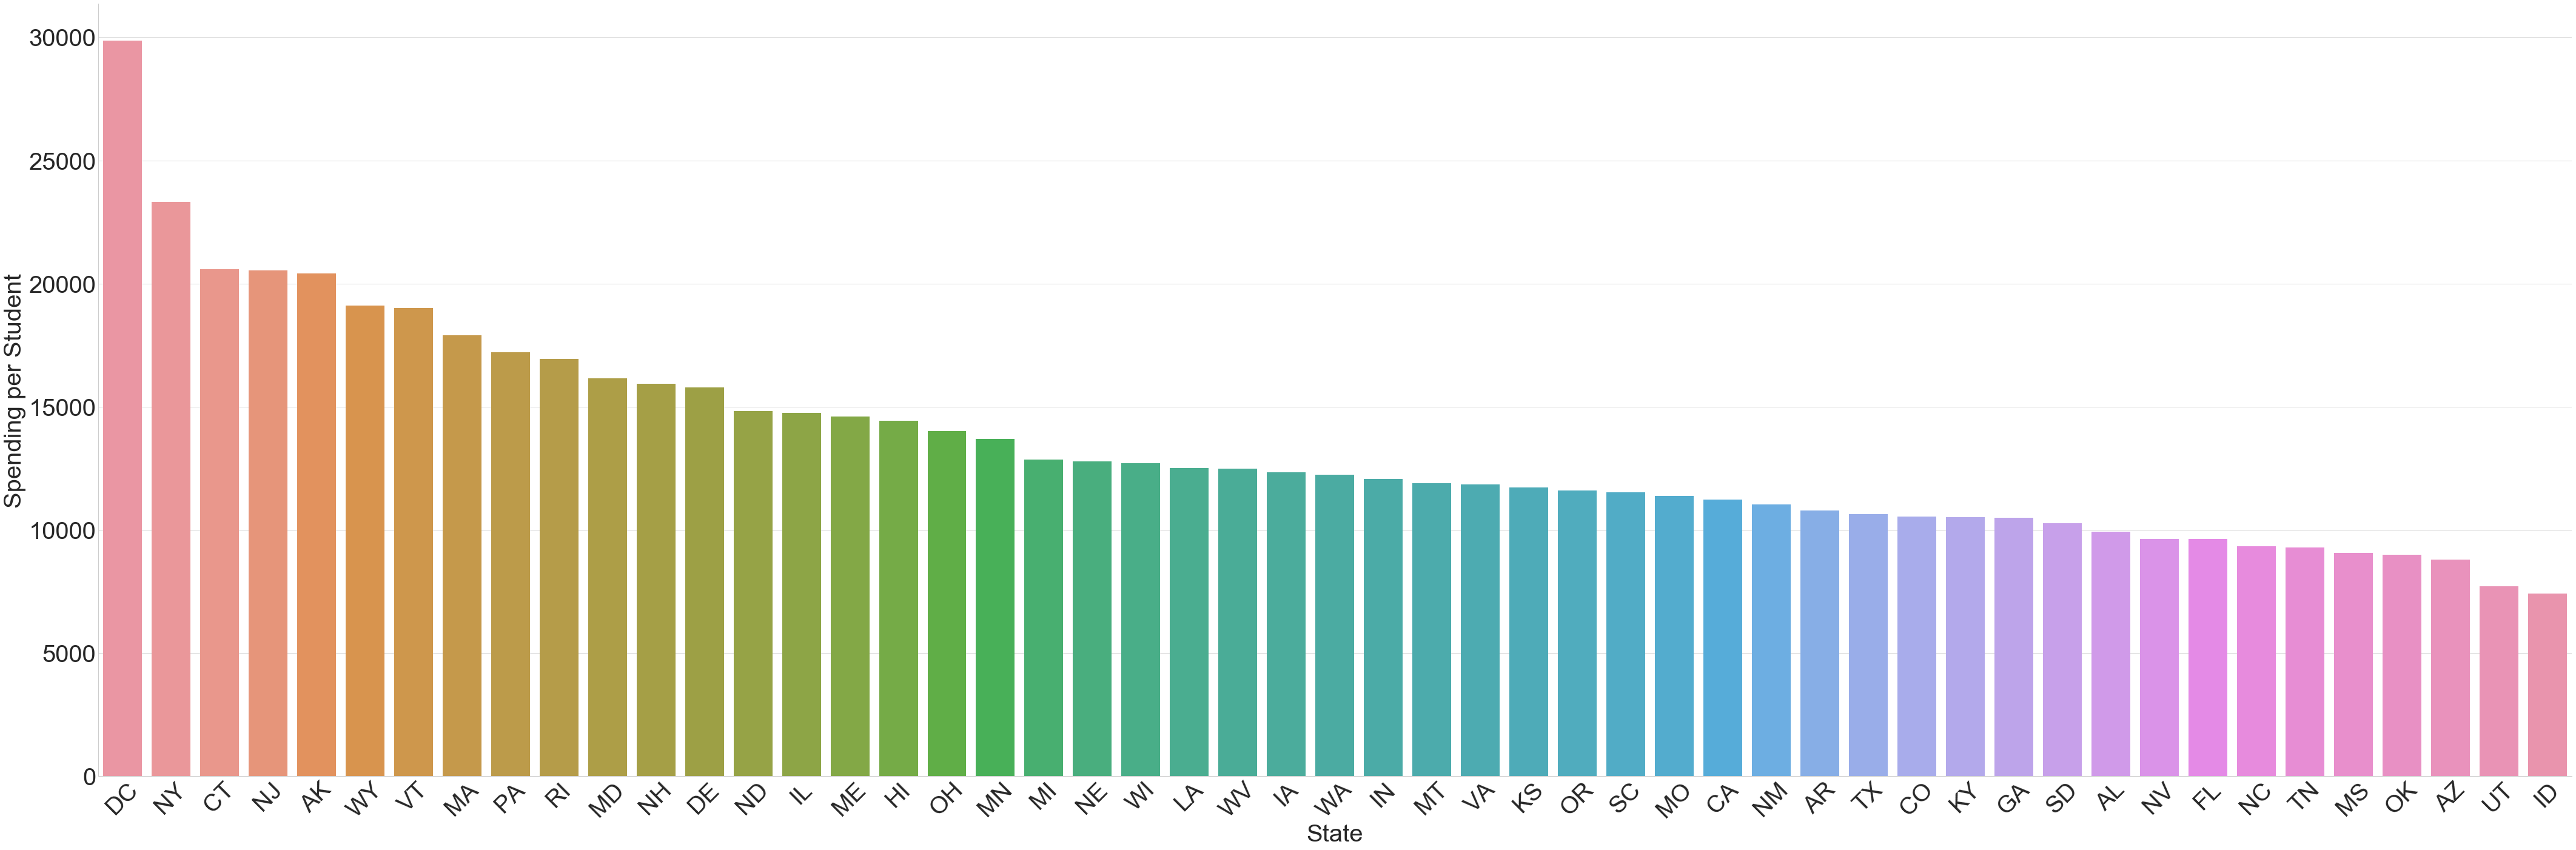

In [33]:
sns.factorplot(data=stu_spend_df, x='State', y='Spending per Student', kind='bar', size=20, aspect=3)
sns.set_style("whitegrid")
plt.xticks(rotation=45)
plt.rc('font', size=40)
plt.show()

In [39]:
# plotly test
trc = dict(type='choropleth', locations=stu_spend_df["State"], locationmode='USA-states', colorscale='Viridis',
          z=stu_spend_df["Spending per Student"], colorbar = dict(title = "Thousands of Dollars"))
lyt=dict(geo=dict(scope='usa'), title = 'Spending per Student by State')
map=go.Figure(data=[trc], layout=lyt)
py.iplot(map)

In [36]:
# plotly test
trc = dict(type='choropleth', locations=preg_data_df["STATE"], locationmode='USA-states', colorscale='Picnic',
          z=preg_data_df["RATE"], colorbar = dict(
            title = "Percent (%)"))

layout=dict(geo=dict(scope='usa'),  title = 'Teen Pregnancy Rates per State')
map=go.Figure(data=[trc], layout=layout)

py.iplot(map)

In [79]:
trc = dict(type='choropleth', locations=renamed_df["ST"], locationmode='USA-states', colorscale='Greens',
          z=renamed_df["TOTAL REVENUES FROM ALL SOURCES"], colorbar = dict(
            title = "Billions of Dollars"))

layout=dict(geo=dict(scope='usa'),  title = 'School Funding (Revenue) by State')
map=go.Figure(data=[trc], layout=layout)

py.iplot(map)

In [61]:
sat_scores = os.path.join('Resources', 'SATscores.csv')
sat_df = pd.read_csv(sat_scores)
#sat_df.head()

In [73]:
sat_df = dict(type='choropleth', locations=sat_df['State'], locationmode='USA-states', colorscale='Blues',
        z=sat_df['Average New SAT Score'], colorbar = dict(
          title = "Average SAT Score"))

layout=dict(geo=dict(scope='usa'),  title = 'Average SAT Score per State')
map=go.Figure(data=[sat_df], layout=layout)

py.iplot(map)

In [78]:
grad_rates = os.path.join('Resources','gradrates.csv')
grad_df = pd.read_csv(grad_rates)
grad_df.head()

,State,State1,Average Rate,American Indian/Alaska Native,Asian/Pacific Islander,Hispanic,Black,White
0,AL,Alabama,0.871,0.900,0.910,0.870,0.845,0.886
1,AK,Alaska,0.761,0.640,0.810,0.760,0.740,0.808
2,AZ,Arizona,0.795,0.677,0.890,0.764,0.755,0.840
3,AR,Arkansas,0.870,0.870,0.870,0.857,0.815,0.892
4,CA,California,0.830,0.740,0.929,0.800,0.730,0.880


In [85]:
for col in grad_df.columns:
    grad_df[col] = grad_df[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

grad_df['State1'] = grad_df['State1'] + '<br>' +\
    'Average Rate: '+grad_df['Average Rate']+\
    'Average American Indian/Alaska Native Rate: '+grad_df['American Indian/Alaska Native']+\
    'Average Asian/Pacific Islander Rate: '+grad_df['Asian/Pacific Islander']+\
    'Average Hispanic Rate: '+grad_df['Hispanic']+\
    'Average Black Rate: '+grad_df['Black']+\
    'Average White Rate: '+grad_df['White']
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = grad_df['State1'],
        z = grad_df['Average Rate'].astype(float),
        locationmode = 'USA-states',
        text = grad_df['State1'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Average Graduation Rates")
        ) ]
layout = dict(
        title = 'Average Graduation Rates per State<br>(Hover for breakdown for each rate)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
map=go.Figure(data=grad_df, layout=layout)
py.iplot(map)

PlotlyDictValueError: 'data' has invalid value inside 'figure'

Path To Error: ['data']

Current path: []
Current parent object_names: []

Additionally:

    role: object

